In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import soundfile as sf
import tensorflow as tf

DATADIR="/Users/macbook/Downloads/EE1390-master/AI-ML/audio_dataset"
CATEGORIES=["new_backs","new_forwards","new_lefts_original","new_rights_original","new_stops"]
training_data=[]
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for sfile in os.listdir(path):
        try:
            snd_array,samplerate=sf.read(sfile)
            new_arr=[]
            for i in range(0,24000):
                if(i<len(snd_array)):
                    new_arr.append(snd_array[i])
                else:
                    new_arr.append(0)
            training_data.append([new_arr,class_num])
        except Exception as e:
                pass
import random
random.shuffle(training_data)

X_train=[]
y_train=[]
for sample in training_data:
    X_train.append(sample[0])
    y_train.append(sample[1])
X_train=np.array(X_train).reshape(len(training_data),-1)
y_train=np.array(y_train)



In [14]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(5,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(5,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(5,activation=tf.nn.softmax))


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=300,steps_per_epoch=400,verbose=1)

Epoch 1/20
400/400 [==============================] - 18s 46ms/step - loss: 0.6464 - acc: 0.7569
Epoch 2/20
400/400 [==============================] - 17s 43ms/step - loss: 0.2433 - acc: 0.8953
Epoch 3/20
400/400 [==============================] - 17s 42ms/step - loss: 0.1237 - acc: 0.9704
Epoch 4/20
400/400 [==============================] - 17s 43ms/step - loss: 0.0786 - acc: 0.9792
Epoch 5/20
400/400 [==============================] - 17s 43ms/step - loss: 0.0691 - acc: 0.9843
Epoch 6/20
400/400 [==============================] - 17s 43ms/step - loss: 0.0576 - acc: 0.9861
Epoch 7/20
400/400 [==============================] - 17s 43ms/step - loss: 0.0513 - acc: 0.9869
Epoch 8/20
400/400 [==============================] - 17s 42ms/step - loss: 0.0489 - acc: 0.9869
Epoch 9/20
400/400 [==============================] - 17s 42ms/step - loss: 0.0470 - acc: 0.9869
Epoch 10/20
400/400 [==============================] - 17s 42ms/step - loss: 0.0424 - acc: 0.9876
Epoch 11/20
400/400 [========

In [16]:
predictions=model.predict([X_train])

In [17]:
predictions[1]

array([3.0153874e-37, 1.2166717e-32, 1.2296804e-06, 4.8084307e-18,
       9.9999881e-01], dtype=float32)

In [19]:
y_train[1]

4

In [114]:
a = [3, 1, 41, 52, 15, 4, 1, 63, 12 ]
p=0.2
vol=0
a = sorted(a)
for i in range(0,len(a)):
    vol=vol+a[i]*(1-p)**(len(a)-i-1)
vol

145.90983936

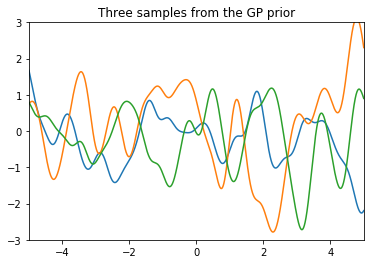

In [123]:
import numpy as np
import matplotlib.pyplot as pl

n = 5000
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

L = np.linalg.cholesky(K_ss + 1e-10*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
pl.show()

In [ ]:
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()

In [ ]:
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

In [ ]:
v=kernel(Xtest,Xtest,0.1)
v